# TME-1 Velib.

#### Mario Viti.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axes, sci
from IPython.display import display, Image #Config the matlotlib backend as plotting inline in IPython
import pprint
import pylab
pp = pprint.PrettyPrinter(indent=4)
%matplotlib inline
pylab.rcParams['figure.figsize'] = (6.0, 5.0)
import pickle as pkl

In [2]:
# ouvrir le donnees
fname = 'dataVelib.pkl'
f = open(fname, 'rb')
data = pkl.load(f)
f.close()

In [3]:
def stations_paris_donnees(data):
    s_paris = [ station for station in data if station['number']/1000 >= 1 and station['number']/1000 <= 20 ]
    stations = np.array([0,1,2,3,4,5])
    for station in s_paris:
        stat = np.array([station['alt'], 
                        station['position']['lat'], 
                        station['position']['lng'],
                        station['number']/1000,
                        station['bike_stands'],
                        station['available_bike_stands']])
        stations = np.vstack((stations,stat))
    stations = stations[1:]
    return stations
stations = stations_paris_donnees(data)

# Probability distribution.
In this population, the individuals are the stations each with different caracters or random variables:

- Ar: a number representing the arrondisement of Paris of the station.
- Al: the altitude
- Sp: station is full (binary)
- Vd: station is empty, or 2 velib at most.

### Compute the following:
- P[Ar]
- P[Al] 
- P[Sp | Al]
- P[Vd | Al]
- P[Vd | Ar]


In [19]:
def X_station_avec2velo_disp(stations):
    return np.where(stations[:,4] - stations[:,5] >= 2,1.,0.)

def X_station_plein(stations):
    return np.where(stations[:,5] == 0, 1.,0.)

def P_(stations_data, bins):
    y, x, = np.histogram(stations_data, bins=bins, normed=True)
    return y

def construire_tableau(stations, Vb, n_interval_alt = 100):
    # Construir un Tableau 2,100 avec cette ligne i =
    # [P(a=i,Vd=1), P(a=i,Vd=0)] 
    nAlt, echal_alt = np.histogram(stations[:,0], n_interval_alt)
    Alt = stations[:,0]
    Alt_vs_Vb = np.zeros((n_interval_alt,2))
    for i in range(len(Alt)):
        for j in range(n_interval_alt):
            # Pour chaque station i on voit dans le liste echal_alt pour le correct intervalle de altitude j.
            # En suite on incrément le valeur correspondante dans Alt_vs_Vd [j][Vd_i].
            if Alt[i] == echal_alt[-1]:
                Alt_vs_Vb[n_interval_alt-1][int(Vb[i])] += 1.
                break
            elif Alt[i] == echal_alt[0]:
                Alt_vs_Vb[0][int(Vb[i])] += 1.
                break
            elif echal_alt[j] <= Alt[i] and Alt[i] < echal_alt[j+1]:
                Alt_vs_Vb[j][int(Vb[i])] += 1.
                break
    return echal_alt, nAlt, Alt_vs_Vb

Vd = X_station_avec2velo_disp(stations)
Sp = X_station_plein(stations)
PAr = P_(stations[:,3],20) # 1
PAl = P_(stations[:,0],100) # 2
echal_alt,nAlt,Alt_vs_Vd = construire_tableau(stations,Vd)
echal_alt,nAlt,Alt_vs_Sp = construire_tableau(stations,Sp)
# Laplace Correction.
Lc_Alt_vs_Vd = Alt_vs_Vd + 1
Lc_nAlt = nAlt + 2
P_VDscALT = Lc_Alt_vs_Vd.T / np.array((Lc_nAlt,Lc_nAlt))# 3
# Laplace Correction.
Lc_Alt_vs_Sd = Alt_vs_Sp + 1
Lc_nAlt = nAlt + 2
P_SPscALT = Lc_Alt_vs_Sd.T / np.array((Lc_nAlt,Lc_nAlt))# 4

# Trace an Histogram

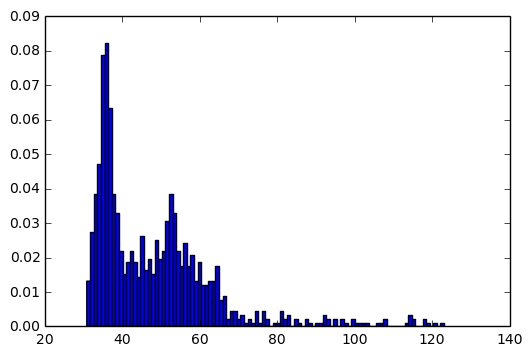

In [21]:
plt.hist(stations[:,0],100,normed=True)
plt.show()

# Compute and trace the conditional probability.
We're intrested in E[ P(Vd|Al) ] the expected value of a station being empty or at most 2 velid knowing the altitude.

### For each station compute
Vd = 1 if at most 2 velib are available, 0 o.w.
Al = [0;29] discretization of the hight into 30 intervals.

### Compute P[Vd|Al]
P[Vd|Al] = P[Vd,Al] / P[Al] = 2,30,#stats

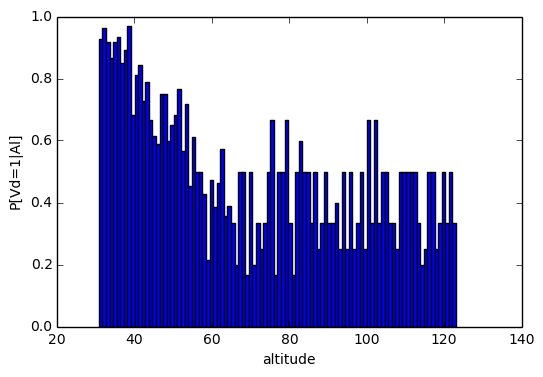

In [4]:
# Station plaine: Variable Aletoire SP = 1 if 0 == available_bike_stands, 0 else
# Velò disponible: Variable Aletoire Vd = 1 if bike_stands-available_bike_stands >= 2, 0 else

def X_station_avec2velo_disp(stations):
    return np.where(stations[:,4] - stations[:,5] >= 2,1.,0.)

def construire_tableau(stations, Vd, n_interval_alt = 100):
    # Construir un Tableau 2,100 avec cette ligne i =
    # [P(a=i,Vd=1), P(a=i,Vd=0)] 
    nAlt, echal_alt = np.histogram(stations[:,0], n_interval_alt)
    Alt = stations[:,0]
    Alt_vs_Vd = np.zeros((n_interval_alt,2))
    for i in range(len(Alt)):
        for j in range(n_interval_alt):
            # Pour chaque station i on voit dans le liste echal_alt pour le correct intervalle de altitude j.
            # En suite on incrément le valeur correspondante dans Alt_vs_Vd [j][Vd_i].
            if Alt[i] == echal_alt[-1]:
                Alt_vs_Vd[n_interval_alt-1][int(Vd[i])] += 1.
                break
            elif Alt[i] == echal_alt[0]:
                Alt_vs_Vd[0][int(Vd[i])] += 1.
                break
            elif echal_alt[j] <= Alt[i] and Alt[i] < echal_alt[j+1]:
                Alt_vs_Vd[j][int(Vd[i])] += 1.
                break
    return echal_alt,nAlt,Alt_vs_Vd

Vd = X_station_avec2velo_disp(stations)

# Calcul et tracé d'une probabilité conditionnelle.
echal_alt,nAlt,Alt_vs_Vd = construire_tableau(stations, Vd)
# Laplace Correction.
Lc_Alt_vs_Vd = Alt_vs_Vd + 1
Lc_nAlt = nAlt + 2
P_VDscALT = Lc_Alt_vs_Vd.T / np.array((Lc_nAlt,Lc_nAlt))

size = echal_alt[1] - echal_alt[0]
plt.bar(echal_alt[0:100] ,P_VDscALT[1] , width=size)
plt.xlabel('altitude')
plt.ylabel('P[Vd=1|Al]')
plt.show()

# Disponibilité:
Afin de réviser les usages de np.where Projeter les stations sur la carte en mettant en:
rouge les stations pleines,
jaune les vides,
verte les autres.

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


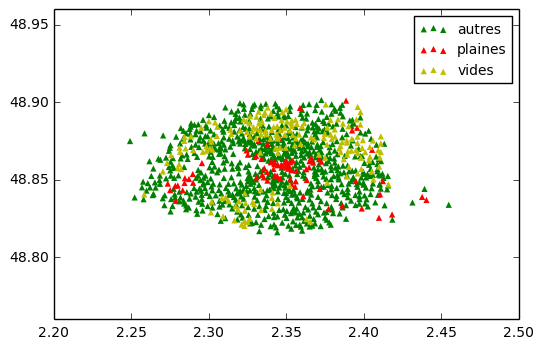

In [5]:
def plot_Paris_scatter(stations, name='paris_velo.pdf'):
    x1 = stations[:,2] # recuperation des coordonnées 
    x2 = stations[:,1]
    indSp, = np.where(stations[:,5] == 0)
    indVd, = np.where(stations[:,4] == stations[:,5])
    indAutre, = np.where(np.logical_and(stations[:,4] != stations[:,5], stations[:,5] != 0 ))
    plt.scatter(x1[indAutre],x2[indAutre], marker='^',c='g',linewidths=0)
    plt.scatter(x1[indSp],x2[indSp], marker='^',c='r',linewidths=0)
    plt.scatter(x1[indVd],x2[indVd], marker='^',c='y',linewidths=0)
    plt.legend(['autres','plaines','vides'], fontsize=10)
    plt.axis('equal')
    plt.savefig(name)
    plt.show()
    
plot_Paris_scatter(stations , name="carteDisponibilité.pdf")

Sur différentes cartes, afficher les stations suivantes:
stations dont l'altitude est inférieure à la moyenne (en conservant le code couleur précédent)
stations dont l'altitude est supérieure à la médiane (en conservant le code couleur précédent)

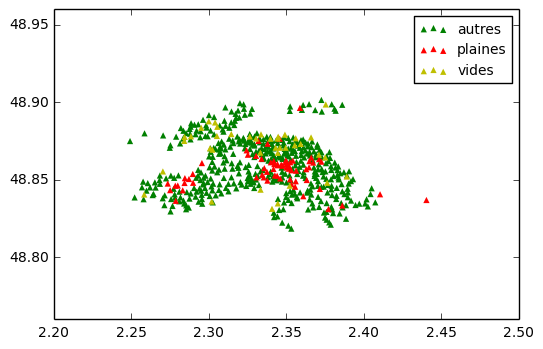

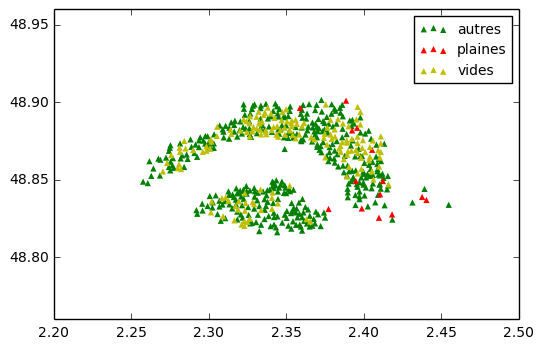

In [6]:
def calcul_moyenne(a):
    return np.sum(a)/len(a)

def calcul_partition(pX):
    partition = np.zeros(len(pX))
    partition[0] = pX[0]
    for i in range(1,len(pX)):
        partition[i] = partition[i-1] + pX[i]
    return partition

def calcul_median(a,intervals=100):
    y, x, = np.histogram(a, bins=intervals, normed=True)
    partition = calcul_partition(y)
    return  x[np.max(np.where(partition<=0.5))]
    
moyenne = calcul_moyenne(stations[:,0])
mediane = calcul_median(stations[:,0])

stations_inf_moyenne = stations[np.where(stations[:,0] < moyenne)]
plot_Paris_scatter(stations_inf_moyenne, name="paris_inf_moyenne.pdf")

stations_sup_mediane = stations[np.where(stations[:,0] > mediane)]
plot_Paris_scatter(stations_sup_mediane, name="paris_sup_mediane.pdf")


# Tests de corrélation
Calculer les corrélations entre les variables Altitude et Vélo disponible
Calculer les corrélations entre les variables Arrondissement et Vélo disponible
Quel facteur est le plus lié au fait qu'(au moins) un vélo soit disponible dans une station?

In [16]:
def variance(X):
    Xc = X - calcul_moyenne(X)
    return calcul_moyenne(Xc*Xc)

def cov(X,Y):
    Xc = X-calcul_moyenne(X)
    Yc = Y-calcul_moyenne(Y)
    return calcul_moyenne(Xc*Yc)
    
def calcul_correlation(X,Y):
    return cov(X,Y)//(np.sqrt(variance(X))*np.sqrt(variance(Y)))

corrAltVd = calcul_correlation(stations[:,0] , stations[:,4] - stations[:,5])
corrAltArr = calcul_correlation(stations[:,3] , stations[:,4] - stations[:,5])

print corrAltVd
print corrAltArr


-1.0
-1.0
